In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.DataFrame?

In [ ]:
df = pd.DataFrame(X, columns=data.feature_names)

In [ ]:
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# load data set
data = load_iris()
X = data['data']
y = data['target']

# train decision tree
treec = DecisionTreeClassifier(max_depth=3)
treec.fit(X, y);

# visual tree
# graphviz.Source(export_graphviz(treec,                                  out_file=None,
#                                  feature_names=data['feature_names'],
#                                  class_names=data['target_names']))

In [ ]:
treec.score(X,y)

In [ ]:
df.min()

In [ ]:
df.max()

In [ ]:
from ipywidgets import interact, IntSlider

def iris_tree(depth=1):
    plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.viridis)
    
    if depth >= 1:
        plt.hlines(0.8, .8, 7, linewidth=1)
    if depth >= 2:
        plt.hlines(1.75, 0.8, 7, linewidth=1)
    if depth >= 3:
        plt.vlines(4.95, 0.8, 1.75, linewidth=1, colors='r')
        plt.vlines(4.85, 1.75, 2.6, linewidth=1, colors='b')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.xlim([0.8, 7])
    plt.ylim([0, 2.6])
    
# depth_slider = IntSlider(value=0, min=0, max=3, step=1, description='depth')
# interact(iris_tree, depth=depth_slider);

### gini impurity metric
|
|----> probability of misclassifying an observation it it were randomly labeled based on distribution of labels of the node/
The equation for the Gini impurity for node $m$ is

$$ G_m = \sum_k p_{mk} (1 - p_{mk}), $$

where $p_{mk}$ is the fraction of observations of class $k$ in node $m$.

In [ ]:
p = np.linspace(1E-6, 1-1E-6, 100)
gini = p*(1-p) + (1-p)*p

plt.plot(p, gini)
plt.xlabel('$p$')
plt.ylabel('Gini');

### Entropy
measure of the amount of missing information. The more information is missing, the more uncertainty exists in a process. The equation for entropy of node $m$ is


$$ H_m = -\sum_{k} p_{mk} \log_2(p_{mk}).$$


In [ ]:
p = np.linspace(1E-6, 1-1E-6, 100)
entropy = -(p*np.log2(p) + p* np.log2(p) )

plt.plot(p, gini)
plt.xlabel('$p$')
plt.ylabel('entropy')

**gini impurity and entropy dont have too much difference**

# REGRESSION TREES
The process of constructing a decision tree for regression is the nearly identical as classification. However, instead performing node splits that result in an overall drop of entropy or Gini impurity, splits are chosen to produce nodes with an overall reduction in variance of the training labels. 

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# load data set
data = fetch_california_housing()
X = data['data']
y = data['target']

# train decision tree
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y);

# visual tree
# graphviz.Source(export_graphviz(tree, 
#                                 out_file=None,
#                                 feature_names=data['feature_names']))

In [ ]:
DecisionTreeClassifier?

In [ ]:
from sklearn.model_selection import GridSearchCV
tree_gs = DecisionTreeClassifier(max_depth=2)
param_grid = {'max_depth': range(1,10), "min_samples_split":[2,4,6,8,10]}
gs = GridSearchCV(tree_gs,
                 param_grid=param_grid,cv=3, n_jobs=2, verbose=1, iid=True)
gs.fit(X,y);


Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: Unknown label type: 'continuous'

In [ ]:
model = gs.best_estimator_


## geometric interpretation

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=250, noise=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def tree_decision_boundary(max_depth=5, min_samples_leaf=2):
    tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    tree.fit(X_train, y_train)
    accuracy = tree.score(X_test, y_test)
    
    X1, X2 = np.meshgrid(np.linspace(-2, 3), np.linspace(-2, 2))
    y_proba = tree.predict_proba(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))[:, 1]
    plt.contourf(X1, X2, y_proba.reshape(50, 50),  16, cmap=plt.cm.bwr, alpha=0.75)
    plt.colorbar()

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='white', cmap=plt.cm.bwr)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('accuracy: {}'.format(accuracy));

# depth_slider = IntSlider(min=1, max=40, step=1, description='max depth')
# min_samples_leaf_slider = IntSlider(min=1, max=20, step=1, description='min leaf size')
# interact(tree_decision_boundary, max_depth=depth_slider, min_samples_leaf=min_samples_leaf_slider);

### if features are highly correlated, thereis difficulty in performing split or separations

## Ensemble models

### random forest

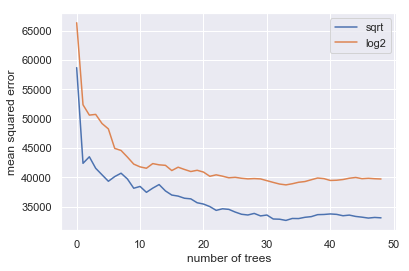

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=100, n_informative=20, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def rf_mse(max_features='sqrt', n_max=50):
    """Generate mean squared errors for growing random forest."""
    
    rgr = RandomForestRegressor(max_features=max_features,
                                max_depth=8, n_estimators=1, 
                                warm_start=True, 
                                random_state=0)
    mse = np.zeros(n_max)

    for n in range(1, n_max):
        rgr.set_params(n_estimators=n)
        rgr.fit(X_train, y_train)
        mse[n-1] = mean_squared_error(y_test, rgr.predict(X_test))

    return mse

for param in ('sqrt', 'log2'):
    mse = rf_mse(max_features=param)
    plt.plot(mse[:-1])

plt.xlabel('number of trees')
plt.ylabel('mean squared error')
plt.legend(['sqrt', 'log2', 'all']);

## extremely randomized forests

## gradient boost

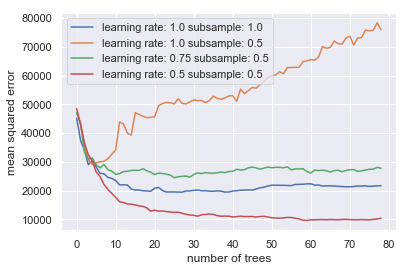

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

def gb_mse(learning_rate=1.0, subsample=1.0, n_max=80):
    """Generate mean squared errors for growing gradient boosting trees."""
    
    rgr = GradientBoostingRegressor(learning_rate=learning_rate,
                                    subsample=subsample,
                                    max_depth=2, 
                                    n_estimators=1, 
                                    warm_start=True, 
                                    random_state=0)
    mse = np.zeros(n_max)

    for n in range(1, n_max):
        rgr.set_params(n_estimators=n)
        rgr.fit(X_train, y_train)
        mse[n-1] = mean_squared_error(y_test, rgr.predict(X_test))

    return mse

def gen_legend_str(hparams):
    """Generate strings for legend in plot."""
    
    base_str = 'learning rate: {} subsample: {}'
    
    return [base_str.format(d['learning_rate'], d['subsample']) for d in hparams]

hparams = ({'learning_rate': 1.0, 'subsample': 1.0},
           {'learning_rate': 1.0, 'subsample': 0.5},
           {'learning_rate': 0.75, 'subsample': 0.5},
           {'learning_rate': 0.5, 'subsample': 0.5})

for kwargs in hparams:
    mse = gb_mse(**kwargs)
    plt.plot(mse[:-1])

legend_strs = gen_legend_str(hparams)
plt.xlabel('number of trees')
plt.ylabel('mean squared error')
plt.legend(legend_strs);

## Feature importance

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    2.9s finished


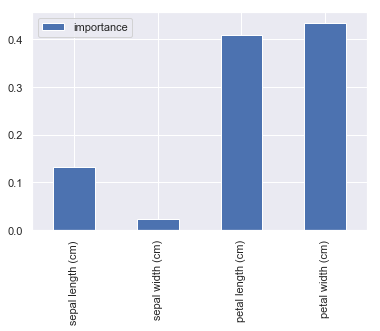

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# load data set
data = load_iris()
X = data['data']
y = data['target']
feature_names = data['feature_names']

# tune random forest
tree = RandomForestClassifier(n_estimators=20, random_state=0)
param_grid = {'max_depth': range(2, 10), 'min_samples_split': [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(tree, param_grid, cv=3, n_jobs=2, verbose=1, iid=True)
grid_search.fit(X, y)
best_model = grid_search.best_estimator_

# plot feature importance
df = pd.DataFrame({'importance': best_model.feature_importances_}, index=feature_names)
df.plot.bar();

## Exercises

1. For the California housing data set, tune `max_depth` and either `min_samples_split` or `min_samples_leaf` for a decision tree regressor.
fm1. Repeat the previous task but use a random forest, extremely randomized trees, and a gradient boosting tree. Consider the available hyperparameters for each of the models and decide which ones to include when tuning. How do the  models perform?

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

def decision_tree (model, name, param_grid, n_iter=100):
    random_search = RandomizedSearchCV(model, param_grid, cv=5,n_jobs=2, n_iter=n_iter)
    random_search.fit(X_train, y_train)
    print ("Evaluating {}".format(name))
    print ("Evaluating R^2: {}". format(random_search.score(X_train, y_train)))
    print ("Testing R^2: {}". format(random_search.best_score_))
    
    return random_search

In [ ]:
param_grid = {"max_depth": range(1,20),
             "min_samples_leaf": range(2,100,2)}


In [ ]:
rgr = GradientBoostingRegressor(n_estimators=50)
gradient_boosting = decision_tree(rgr, 'gradient_boosting', param_grid)


Evaluating gradient_boosting
Evaluating R^2: 0.9688396890379504
Testing R^2: 0.9254407158633993


In [ ]:
GradientBoostingRegressor?

In [ ]:
gradient_boosting.best_params_

{'min_samples_leaf': 28, 'max_depth': 5}

In [ ]:
rgr = GradientBoostingRegressor(n_estimators=50, **gradient_boosting.best_params_)

In [ ]:
param_grid = {"subsample": np.linspace(.01,.99,100),
             'learning_rate': np.linspace(.01,.99,100)}

In [ ]:
gradient_boosting = decision_tree(rgr, "gradient_boosting", param_grid)

Evaluating gradient_boosting
Evaluating R^2: 0.9702047722208437
Testing R^2: 0.9284982315273472


In [ ]:
gradient_boosting.best_params_

{'subsample': 0.9108080808080807, 'learning_rate': 0.23767676767676768}